In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Check for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#Check for unique values in each column
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [65]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [73]:
#check for data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [124]:
#Total charges is categorical whereas it should be numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print('Null: ',data['TotalCharges'].isnull().sum())



Null:  11


In [125]:
# Drop rows with NaN values in 'TotalCharges' column
data.dropna(subset=['TotalCharges'], inplace=True)

In [126]:
print("Data type of 'TotalCharges' column after conversion:", data['TotalCharges'].dtype)

Data type of 'TotalCharges' column after conversion: float64


In [78]:
#CHeck for class distribution
churn_rate = (data['Churn'].value_counts() / len(data) ) *100
print(churn_rate)

Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64


In [27]:
churn_gender = data.groupby(['gender','Churn'])['Churn'].count().reset_index(name = 'Churn Count')

churn_gender

,gender,Churn,Churn Count
0,Female,No,2544
1,Female,Yes,939
2,Male,No,2619
3,Male,Yes,930


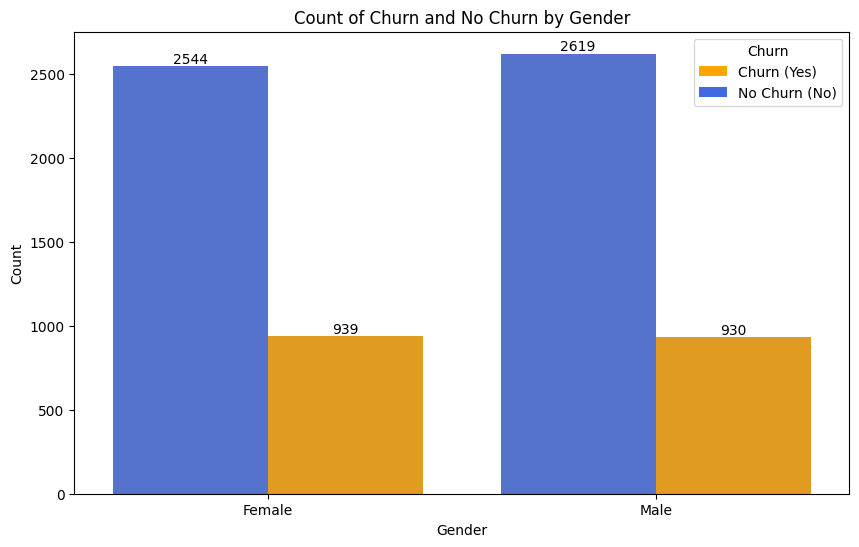

In [52]:
colors = {'Yes': 'orange', 'No': 'royalblue'}  # Map Churn values to colors

# Create a grouped bar plot with custom color palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='gender', y='Churn Count', hue='Churn', data=churn_gender, palette=colors)
ax.set_title('Count of Churn and No Churn by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# Customize legend with appropriate labels and colors
handles = [plt.Rectangle((0, 0), 1, 1, fc=colors[churn]) for churn in ['Yes', 'No']]
labels = ['Churn (Yes)', 'No Churn (No)']
ax.legend(handles, labels, title='Churn', loc='upper right')

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Display annotation only if height (bar value) is greater than 0
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [36]:

churn_service = data.groupby(['InternetService','Churn'])['Churn'].count().reset_index(name = 'Churn Count')

churn_service

,InternetService,Churn,Churn Count
0,DSL,No,1957
1,DSL,Yes,459
2,Fiber optic,No,1799
3,Fiber optic,Yes,1297
4,No,No,1407
5,No,Yes,113


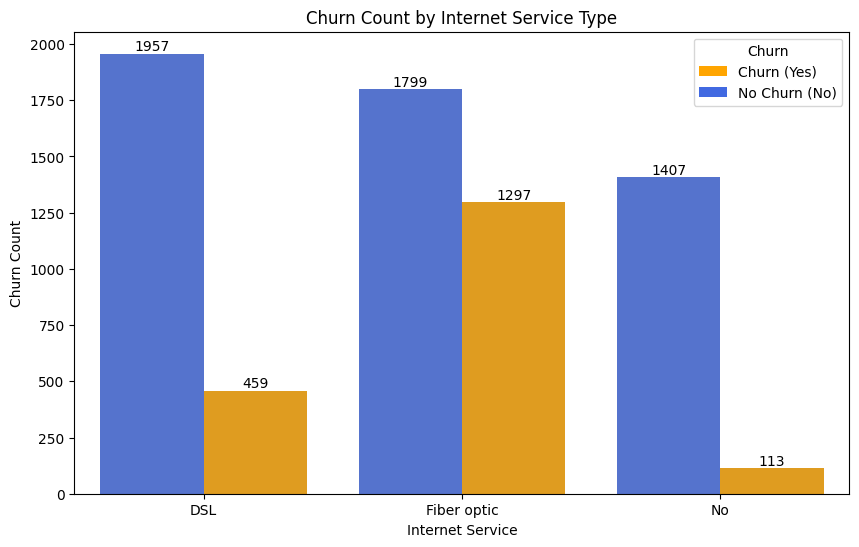

In [51]:
colors = {'Yes': 'orange', 'No': 'royalblue'}  # Map Churn values to colors

# Create a grouped bar plot with custom color palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='InternetService', y='Churn Count', hue='Churn', data=churn_service, palette=colors)
plt.title('Churn Count by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Churn Count')

# Customize legend with appropriate labels and colors
handles = [plt.Rectangle((0, 0), 1, 1, fc=colors[churn]) for churn in ['Yes', 'No']]
labels = ['Churn (Yes)', 'No Churn (No)']
ax.legend(handles, labels, title='Churn', loc='upper right')

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Display annotation only if height (bar value) is greater than 0
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()


Most of the customer churn is from customers who opted for fiber optic internet service

In [44]:
churn_phone = data.groupby(['PhoneService','Churn'])['Churn'].count().reset_index(name = 'Churn Count')
churn_phone

,PhoneService,Churn,Churn Count
0,No,No,510
1,No,Yes,170
2,Yes,No,4653
3,Yes,Yes,1699


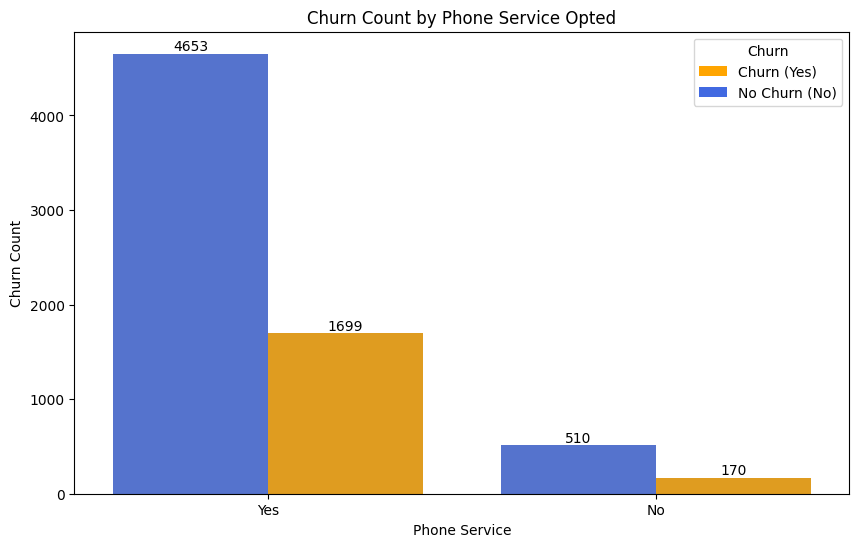

In [50]:
colors = {'Yes': 'orange', 'No': 'royalblue'}  # Map Churn values to colors
category_order = ['Yes', 'No']
# Create a grouped bar plot with custom color palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='PhoneService', y='Churn Count', hue='Churn', data=churn_phone, palette=colors, order=category_order)
plt.title('Churn Count by Phone Service Opted')
plt.xlabel('Phone Service')
plt.ylabel('Churn Count')

# Customize legend with appropriate labels and colors
handles = [plt.Rectangle((0, 0), 1, 1, fc=colors[churn]) for churn in ['Yes', 'No']]
labels = ['Churn (Yes)', 'No Churn (No)']
ax.legend(handles, labels, title='Churn', loc='upper right')

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Display annotation only if height (bar value) is greater than 0
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()


In [53]:
churn_pay = data.groupby(['PaymentMethod','Churn'])['Churn'].count().reset_index(name = 'Churn Count')
churn_pay

,PaymentMethod,Churn,Churn Count
0,Bank transfer (automatic),No,1284
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1289
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1296
7,Mailed check,Yes,308


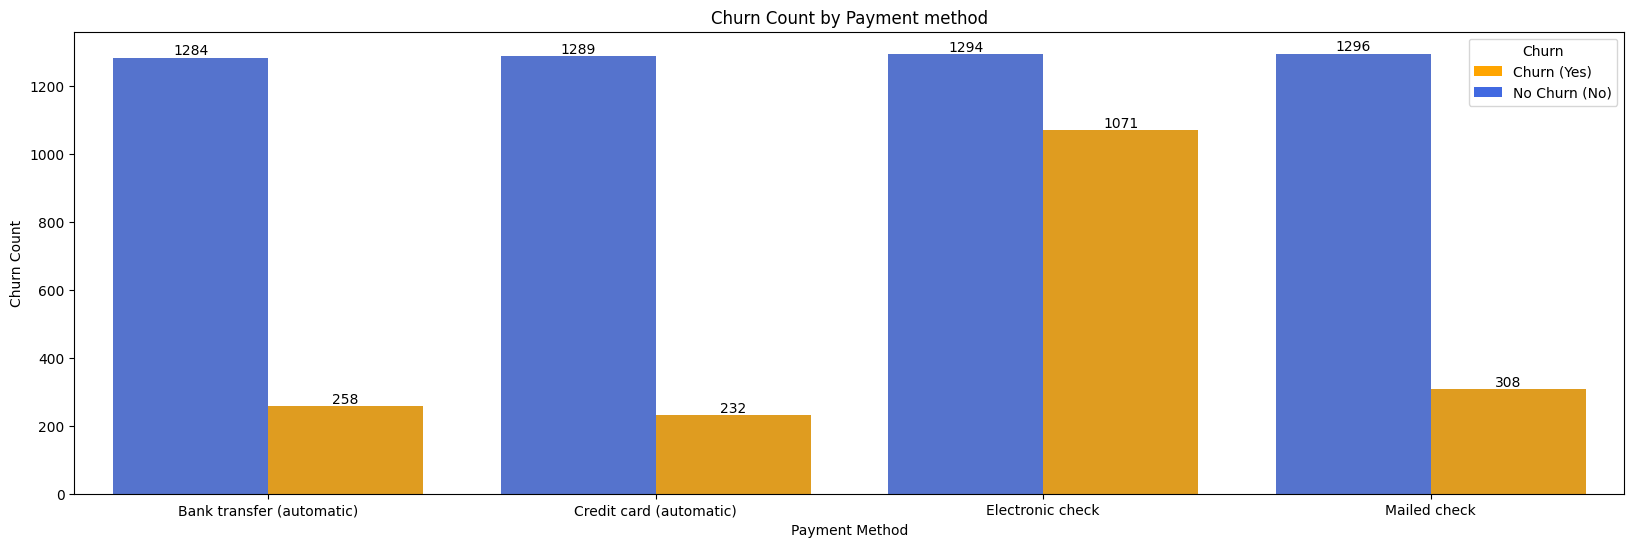

In [58]:
colors = {'Yes': 'orange', 'No': 'royalblue'}  # Map Churn values to colors
# Create a grouped bar plot with custom color palette
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='PaymentMethod', y='Churn Count', hue='Churn', data=churn_pay, palette=colors)
plt.title('Churn Count by Payment method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Count')

# Customize legend with appropriate labels and colors
handles = [plt.Rectangle((0, 0), 1, 1, fc=colors[churn]) for churn in ['Yes', 'No']]
labels = ['Churn (Yes)', 'No Churn (No)']
ax.legend(handles, labels, title='Churn', loc='upper right')

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Display annotation only if height (bar value) is greater than 0
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()


The no. of churners who pay by Electronic CHeck relatively very high compared to other payment types. The issue with Electronic payment needs to be further analysed and addressed. May be that customers are facing issues using this method.

In [59]:
churn_contract = data.groupby(['Contract','Churn'])['Churn'].count().reset_index(name = 'Churn Count')

churn_contract

,Contract,Churn,Churn Count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1306
3,One year,Yes,166
4,Two year,No,1637
5,Two year,Yes,48


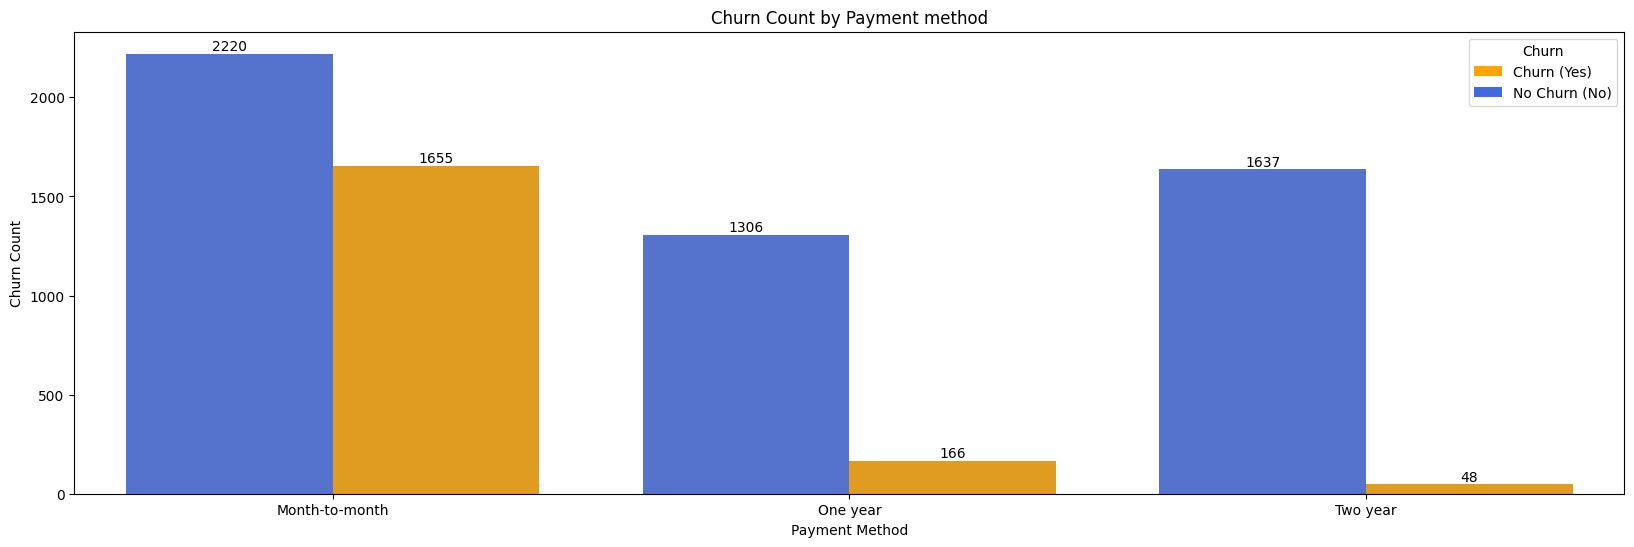

In [60]:
colors = {'Yes': 'orange', 'No': 'royalblue'}  # Map Churn values to colors
# Create a grouped bar plot with custom color palette
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='Contract', y='Churn Count', hue='Churn', data=churn_contract, palette=colors)
plt.title('Churn Count by Payment method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Count')

# Customize legend with appropriate labels and colors
handles = [plt.Rectangle((0, 0), 1, 1, fc=colors[churn]) for churn in ['Yes', 'No']]
labels = ['Churn (Yes)', 'No Churn (No)']
ax.legend(handles, labels, title='Churn', loc='upper right')

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Display annotation only if height (bar value) is greater than 0
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()


Customer on month-to -month contract basis are more likely to churn

In [62]:

churn_paperless = data.groupby(['PaperlessBilling','Churn'])['Churn'].count().reset_index(name = 'Churn Count')

churn_paperless

,PaperlessBilling,Churn,Churn Count
0,No,No,2395
1,No,Yes,469
2,Yes,No,2768
3,Yes,Yes,1400


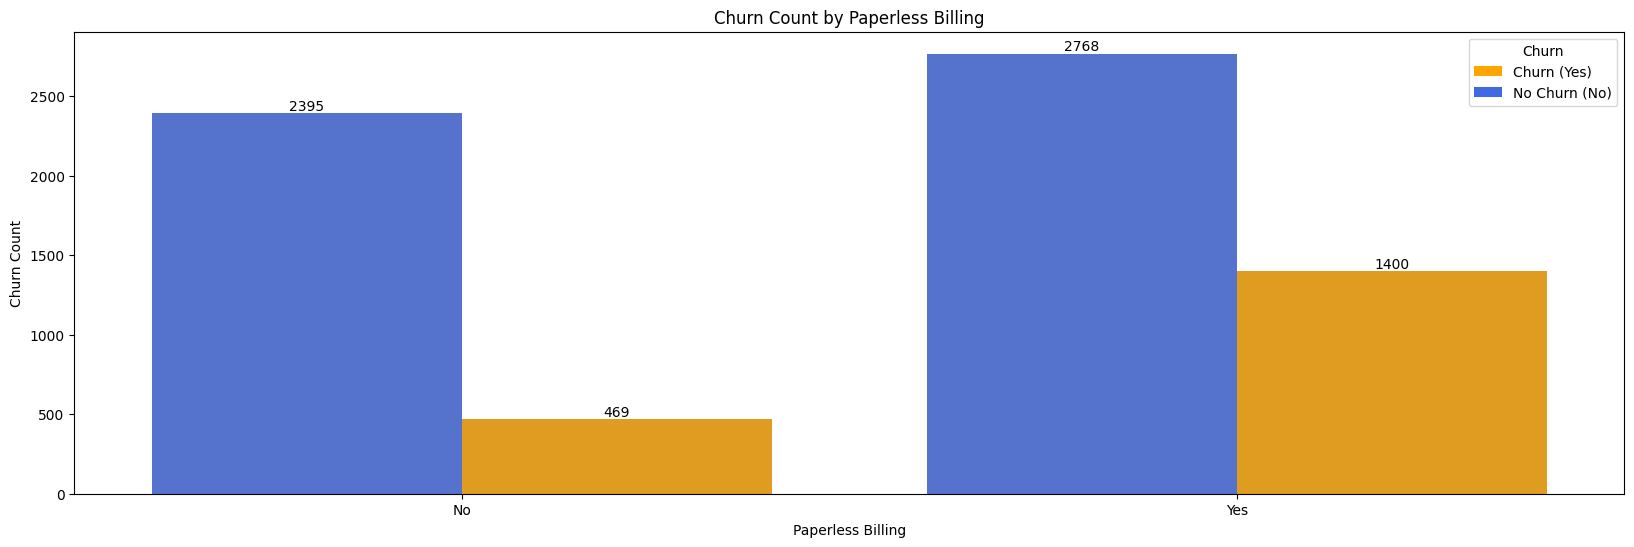

In [64]:
colors = {'Yes': 'orange', 'No': 'royalblue'}  # Map Churn values to colors
# Create a grouped bar plot with custom color palette
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='PaperlessBilling', y='Churn Count', hue='Churn', data=churn_paperless, palette=colors)
plt.title('Churn Count by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Churn Count')

# Customize legend with appropriate labels and colors
handles = [plt.Rectangle((0, 0), 1, 1, fc=colors[churn]) for churn in ['Yes', 'No']]
labels = ['Churn (Yes)', 'No Churn (No)']
ax.legend(handles, labels, title='Churn', loc='upper right')

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Display annotation only if height (bar value) is greater than 0
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()


Customers who opt for paperless billing are more likely to churn. The company needs to check if there's an issue with the online/paperless billing system

In [78]:
bins = [0, 30, 50, 70, 100, 120]  # Customize bins as needed based on your data distribution
labels = ['0-30', '30-50', '50-70', '70-100', '100-120']

# Assign each row to a charge bucket based on MonthlyCharges
data['ChargeBucket'] = pd.cut(data['MonthlyCharges'], bins=bins, labels=labels, right=False)
churn_monthly_charge = data.groupby(['ChargeBucket', 'Churn'])['Churn'].count().reset_index(name = 'Churn Count')

In [101]:
# Pivot the data to summarize total customers and churned customers by ChargeBucket and Churn
summary_table = churn_monthly_charge.pivot_table(index='ChargeBucket', columns='Churn', values='Churn Count', fill_value=0)

# Calculate TotalCustomers and ChurnedCustomers for each ChargeBucket
summary_table['TotalCustomers'] = summary_table['No'] + summary_table['Yes']
summary_table['ChurnedCustomers'] = summary_table['Yes']

# Calculate ChurnRate as percentage
summary_table['ChurnRate'] = (summary_table['ChurnedCustomers'] / len(data['Churn'])) * 100


# Display the churn rate summary
print("Churn Rate Summary:")

print("Sum of Churn Rates:", summary_table['ChurnRate'].sum())
print(summary_table)

Churn Rate Summary:
Sum of Churn Rates: 26.536987079369585
Churn             No     Yes  TotalCustomers  ChurnedCustomers  ChurnRate
ChargeBucket                                                             
0-30          1491.0   162.0          1653.0             162.0   2.300156
30-50          442.0   199.0           641.0             199.0   2.825500
50-70          924.0   234.0          1158.0             234.0   3.322448
70-100        1666.0  1017.0          2683.0            1017.0  14.439869
100-120        651.0   257.0           908.0             257.0   3.649013


C:\Users\Raya\AppData\Local\Temp\ipykernel_16744\184869498.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ChargeBucket', y='ChurnRate', data=summary_table, palette=colors)


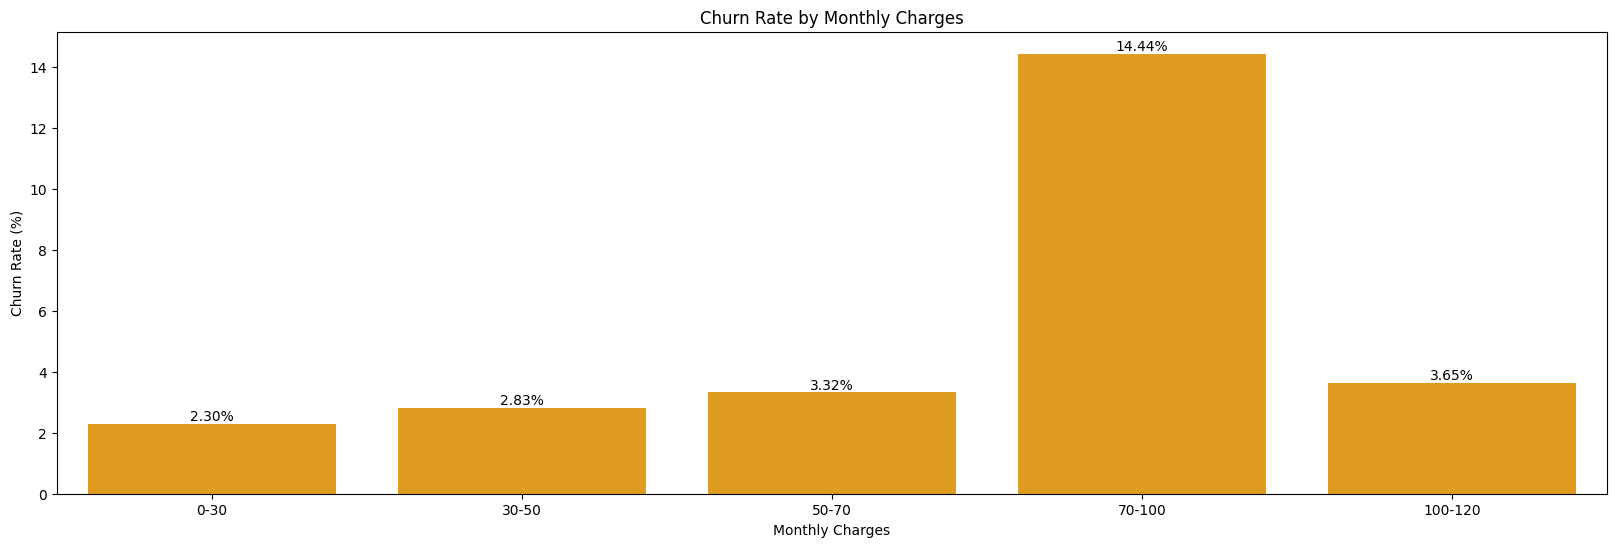

In [112]:
charge_buckets = summary_table.index.tolist()
colors = {'Yes': 'orange'}  # Map Churn values to colors

# Add missing keys to the colors palette for each ChargeBucket
for bucket in charge_buckets:
    if bucket not in colors:
        colors[bucket] = 'orange'  # Assign a default color for missing ChargeBucket values

# Create a grouped bar plot with custom color palette
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='ChargeBucket', y='ChurnRate', data=summary_table, palette=colors)
plt.title('Churn Rate by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate (%)')



# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Display annotation only if height (bar value) is greater than 0
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Customers that pay between 70 to 100 per month have a higher churn rate

In [115]:
data.drop(['ChargeBucket'], axis=1, inplace=True)

In [116]:
categorical_columns = data.nunique()[data.nunique() < 5].keys().tolist()
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [127]:
# Select numerical columns for scaling
target = ['Churn']
custid = ['customerID']

numerical_columns = [x for x in data.columns if x not in target + custid + categorical_columns]
numerical_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [128]:
from sklearn.preprocessing import StandardScaler



# Initialize StandardScaler
scaler = StandardScaler()

# Perform feature scaling on numerical columns only
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Check the scaled DataFrame
print(data.head())


   customerID  gender  SeniorCitizen Partner Dependents    tenure  \
0  7590-VHVEG  Female              0     Yes         No -1.280248   
1  5575-GNVDE    Male              0      No         No  0.064303   
2  3668-QPYBK    Male              0      No         No -1.239504   
3  7795-CFOCW    Male              0      No         No  0.512486   
4  9237-HQITU  Female              0      No         No -1.239504   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No        

In [129]:

categorical_columns = [c for c in categorical_columns if c != 'Churn']
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [130]:
#iOnehot encoding the categorical variables

data = pd.get_dummies(data, columns=categorical_columns,dtype=int)


In [131]:
data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,No,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,No,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,Yes,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0.512486,-0.747850,-0.195248,No,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,-1.239504,0.196178,-0.940457,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [132]:
data.drop(['customerID'],axis =1, inplace=True)

In [133]:
# Replace 'yes' with 1 and 'no' with 0 in the 'Churn' column
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})

In [134]:
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.280248,-1.161694,-0.994194,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0.064303,-0.260878,-0.173740,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,-1.239504,-0.363923,-0.959649,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0.512486,-0.747850,-0.195248,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,-1.239504,0.196178,-0.940457,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [135]:
#use smote to address class imbalance
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after resampling
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())


Class distribution after SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [136]:
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.280248,-1.161694,-0.994194,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0.064303,-0.260878,-0.173740,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,-1.239504,-0.363923,-0.959649,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0.512486,-0.747850,-0.195248,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,-1.239504,0.196178,-0.940457,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [137]:
target = data['Churn']
X = data.drop('Churn',axis=1)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)


In [163]:
# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, max_features = 15, max_depth = 30, min_samples_split = 40,random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.7995735607675906
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1033
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [164]:
# Calculate AUC
auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:,1])
print("AUC:", auc)

AUC: 0.8297311708279194
